# Estudio de Recurrencia del Cáncer Tiroideo

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('thyroid_dyff.csv')
df.head(9)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
df.shape

(383, 17)

In [18]:
df.isnull().min()

Age                     False
Gender                  False
Smoking                 False
Hx Smoking              False
Hx Radiothreapy         False
Thyroid Function        False
Physical Examination    False
Adenopathy              False
Pathology               False
Focality                False
Risk                    False
T                       False
N                       False
M                       False
Stage                   False
Response                False
Recurred                False
dtype: bool

In [7]:
df.duplicated().sum()

19

## Transformación de los Datos

### Eliminación de duplicados

In [8]:
df = df.drop_duplicates(inplace = False)

In [9]:
df.shape

(364, 17)

## Visualización de los Datos

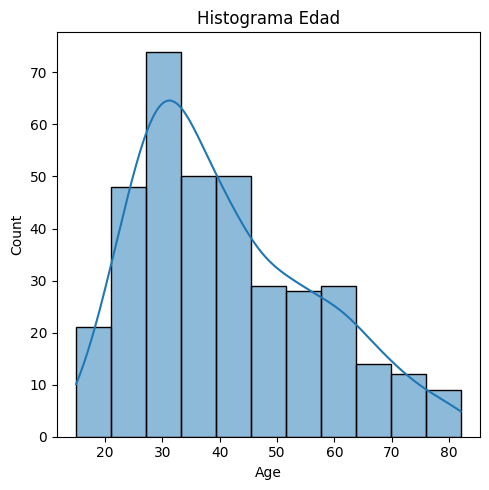

In [45]:
plt.subplots(figsize=(5, 5))
sns.histplot(data = df, x = 'Age' , kde=True)
plt.title('Histograma Edad')

plt.tight_layout()
plt.show()

In [11]:
cat_cols = df.select_dtypes(include = ['object']).columns

In [12]:
cat_cols

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

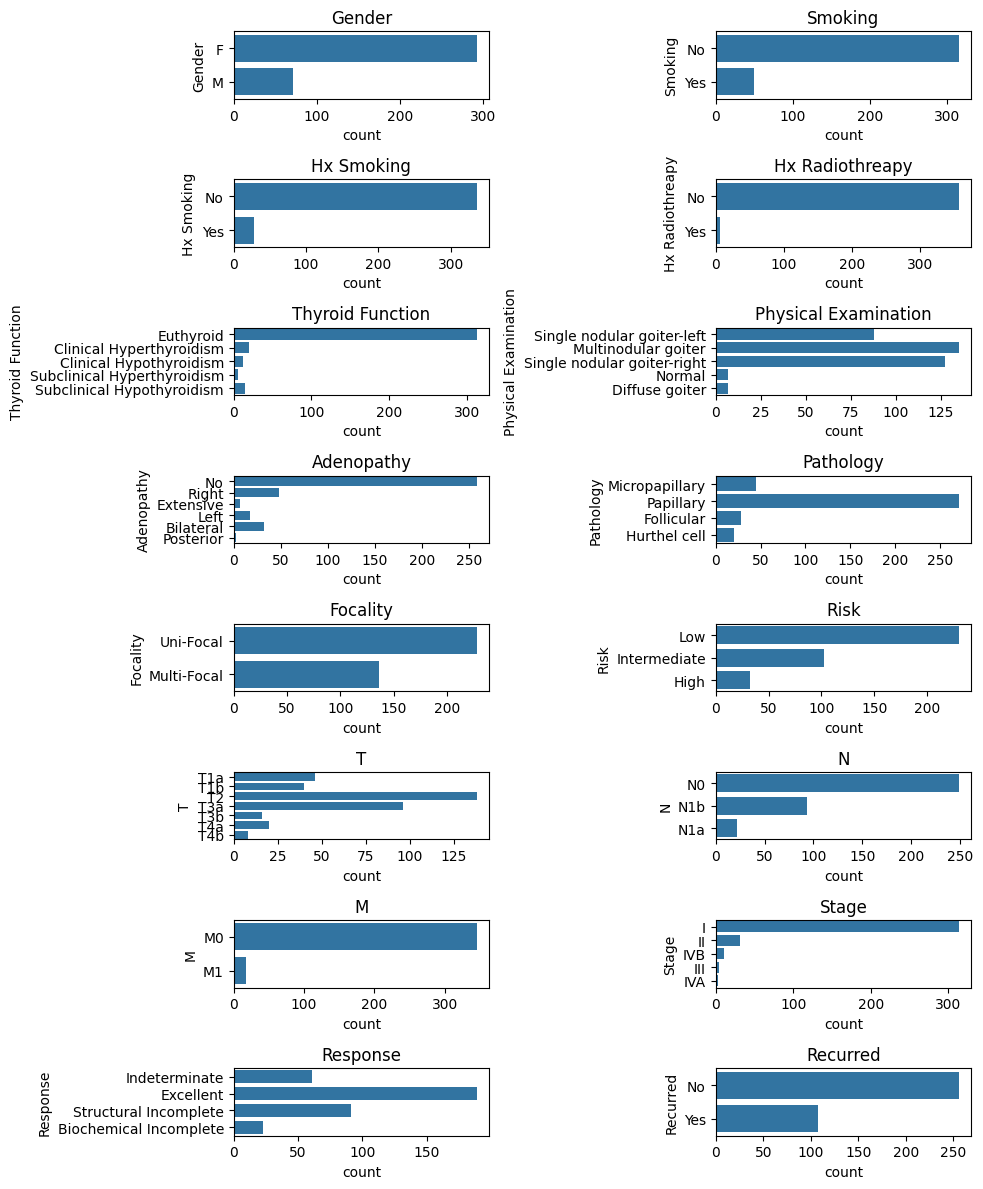

In [13]:
f, ax = plt.subplots(8,2 , figsize=(10, 12))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, y= cols , ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

In [13]:
def group_recurred(cols):
    cols_recurred = df.groupby([cols,'Recurred']).size().reset_index(name='count')
    
    return cols_recurred

In [14]:
Gender_Recurred = group_recurred(df['Gender'])
Smoking_Recurred =  group_recurred(df['Smoking'])
Thyroid_Function_Recurred = group_recurred(df['Thyroid Function'])
Physical_Examination_Recurred = group_recurred(df['Physical Examination'])
Stage_Recurred = group_recurred(df['Stage'])

In [15]:
px.bar(Gender_Recurred, y= 'count', x = 'Gender' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by gender', text_auto = True)

In [16]:
px.bar(Smoking_Recurred, y= 'count', x = 'Smoking' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by Smoking', text_auto = True)

In [17]:
px.bar(Thyroid_Function_Recurred, y= 'count', x = 'Thyroid Function' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by Thyroid Function', text_auto = True)

In [18]:
px.bar(Physical_Examination_Recurred, y= 'count', x = 'Physical Examination' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by Physical Examination', text_auto = True)

In [19]:
px.bar(Stage_Recurred, y= 'count', x = 'Stage' , color = 'Recurred', barmode = 'group', title = 'Number of Recurrence by Stage', text_auto = True)


## Correlación

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

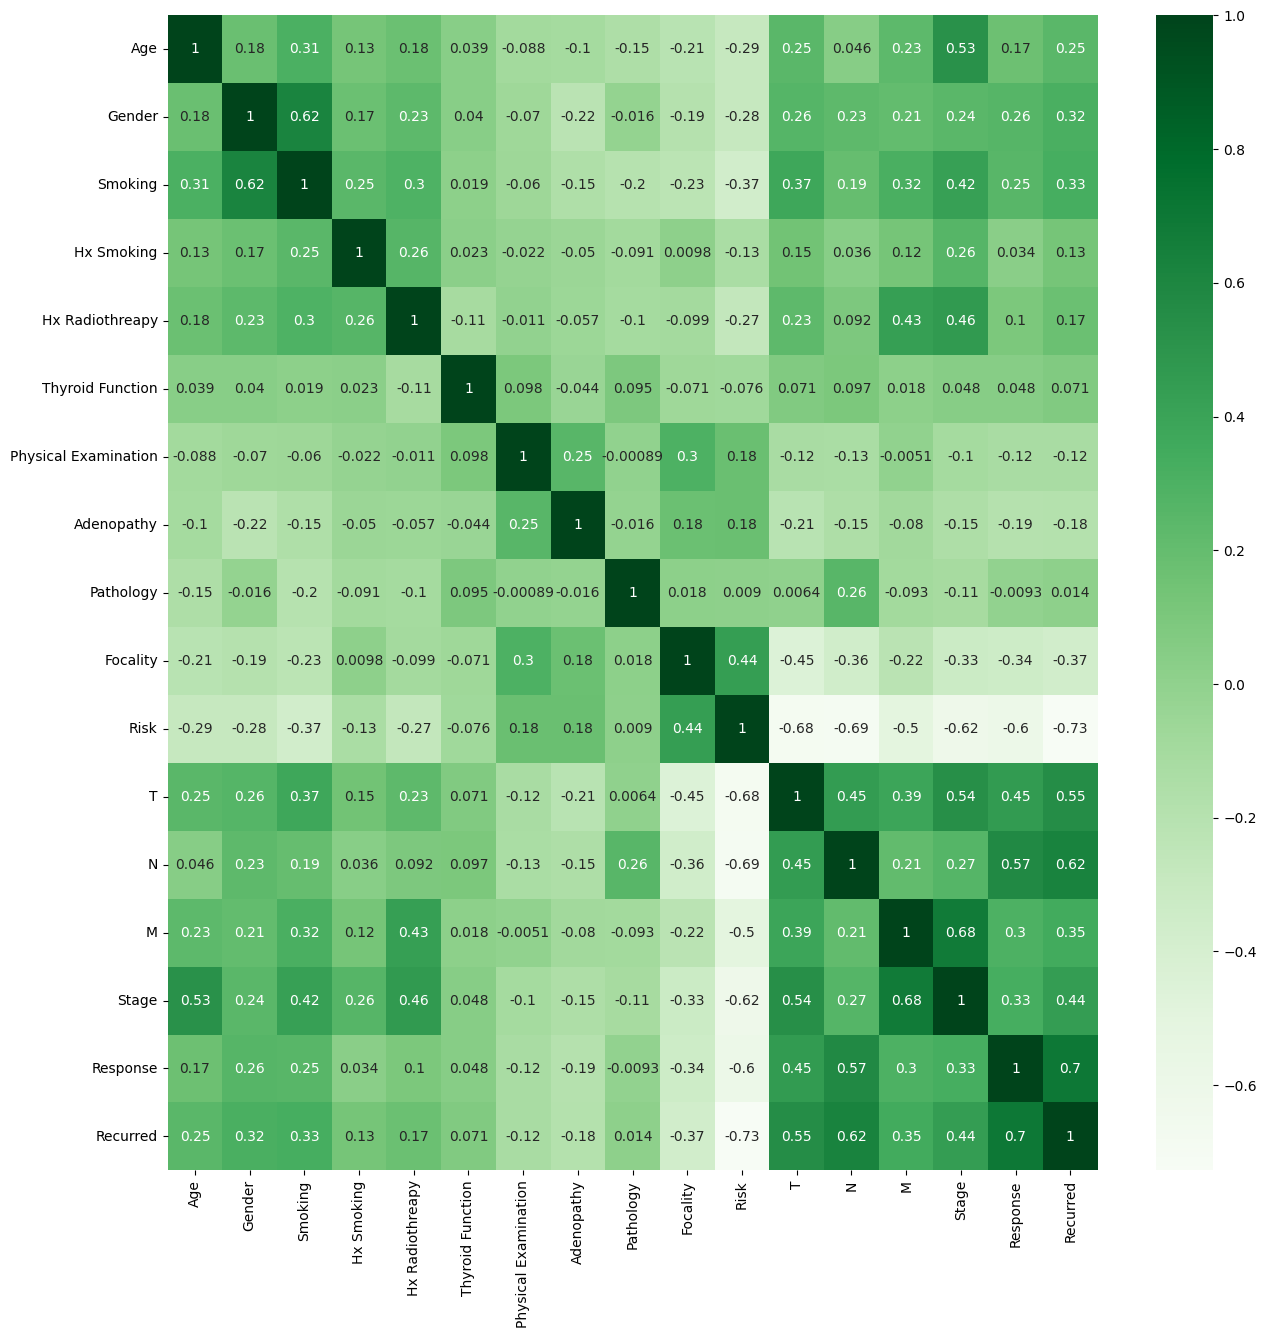

In [21]:
plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap='Greens')
plt.show()

## Variables Excluíbles

Aquí está la información organizada en una tabla:

| **Variable**             | **Motivo de Exclusión**                                                         | **Correlaciones Relevantes**                   | **Correlación Máxima** |
|--------------------------|--------------------------------------------------------------------------------|------------------------------------------------|-------------------------|
| **Thyroid Function**     | Correlaciones muy bajas con todas las demás variables                          | Entre -0.11 y 0.097                            | Ninguna correlación significativa (< 0.1) |
| **Pathology**            | Correlaciones muy débiles con casi todas las variables                         | La mayoría cerca de 0                          | 0.26 con N              |
| **Physical Examination** | Correlaciones generalmente bajas                                               | 0.25 con Adenopathy, 0.3 con Focality          | Resto cercanas a 0     |
| **Recurred**             | Es la variable objetivo                                                        | N/A                                            | N/A                     |

## Modelado

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.inspection import permutation_importance

In [23]:
# x= df.drop(['Recurred'],axis=1)
# y= df['Recurred']
x = df.drop(['Recurred', 'Thyroid Function', 'Pathology', 'Physical Examination'], axis=1)
y = df['Recurred']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
abc = AdaBoostClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, abc, lgr, xgb]

names = ["Random Forest", "Ada Boost", "Logistic Regression", "XGBoost"]

Random Forest accuracy: 0.9589
Random Forest AUC-ROC: 0.9884
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.95      0.91      0.93        22

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73



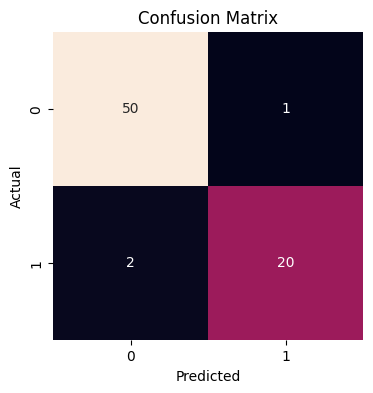

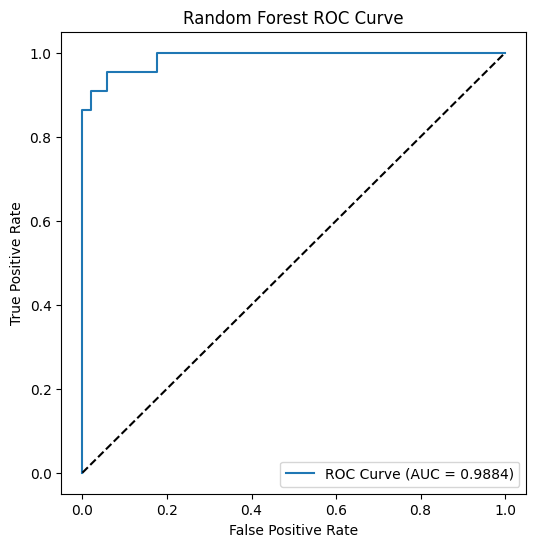

------------------------------------------------------------
Ada Boost accuracy: 0.9315
Ada Boost AUC-ROC: 0.9938
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.87      0.91      0.89        22

    accuracy                           0.93        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.93      0.93      0.93        73



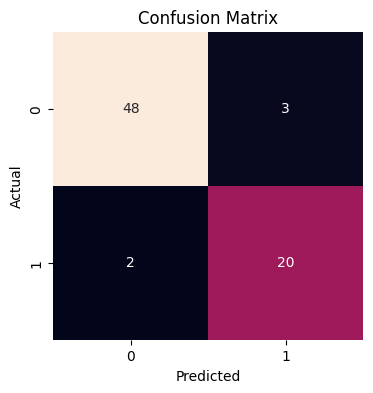

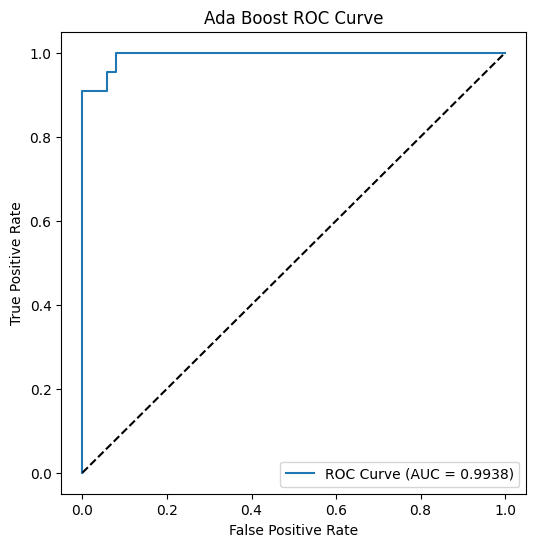

------------------------------------------------------------
Logistic Regression accuracy: 0.9041
Logistic Regression AUC-ROC: 0.9439
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.83      0.86      0.84        22

    accuracy                           0.90        73
   macro avg       0.88      0.89      0.89        73
weighted avg       0.91      0.90      0.90        73



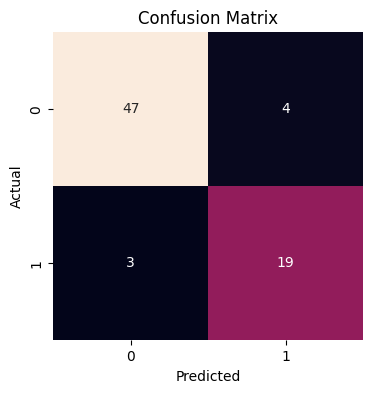

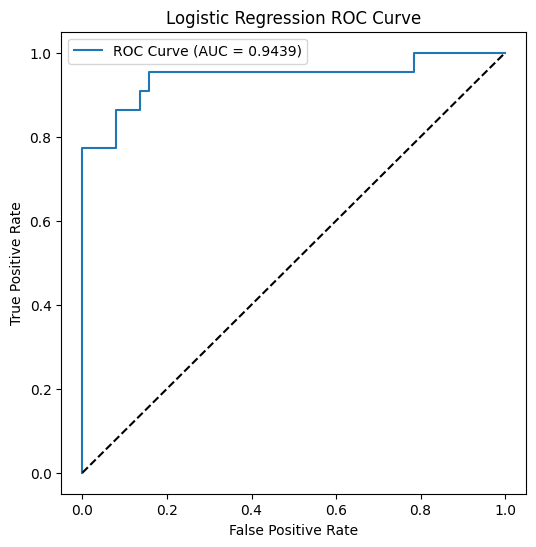

------------------------------------------------------------
XGBoost accuracy: 0.9589
XGBoost AUC-ROC: 0.9929
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.91      0.95      0.93        22

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



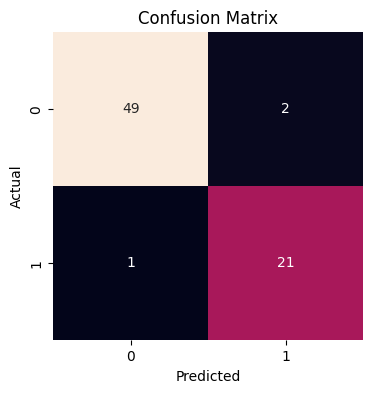

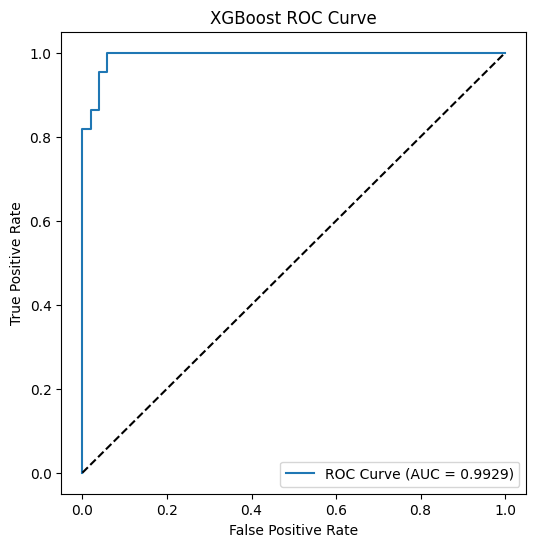

------------------------------------------------------------


In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
    accuracy = accuracy_score(y_test, pred)
    
    # Calcular y almacenar métricas
    ac.append(accuracy)
    auc_score = roc_auc_score(y_test, probas)
    cm = confusion_matrix(y_test, pred)
    
    # Imprimir resultados
    print(f'{names[index]} accuracy: {round(accuracy, 4)}')
    print(f'{names[index]} AUC-ROC: {round(auc_score, 4)}')
    print(classification_report(y_test, pred))
    
    # Graficar matriz de confusión
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Graficar curva ROC
    fpr, tpr, _ = roc_curve(y_test, probas)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {round(auc_score, 4)})')
    plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de no-discriminación
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{names[index]} ROC Curve')
    plt.legend(loc='best')
    plt.show()
    
    print("-"*60)
    index += 1


In [27]:
# index = 0
# ac = []

# for name, model in enumerate(models):
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, pred)
    
#     ac.append(accuracy)
#     cm = confusion_matrix(y_test, pred)
#     print(f'{names[index]} accuracy: {round(accuracy,4)}')
#     print(classification_report(y_test, pred))
 
#     plt.figure(figsize=(4, 4))
#     sns.heatmap(cm, annot=True, fmt="d", cbar=False)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()
#     print("-"*60)
    
#     index += 1

In [28]:
import joblib
from sklearn.preprocessing import StandardScaler

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = []
for model in [rfc, abc, lgr, xgb]:
    if isinstance(model, LogisticRegression):
        model.max_iter = 1000 
    if isinstance(model, AdaBoostClassifier):
        model.algorithm = 'SAMME'
    models.append(model)


for model, name in zip(models, names):
    model.fit(X_train_scaled, y_train)
    joblib.dump(model, f"{name}_model.pkl")


joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Evaluación de Modelos

In [29]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100

In [30]:
px.bar(acc_df , x= 'Accuracy', y='Model', text_auto = True,  title = 'Model Accuracy', orientation='h', template='plotly_dark')

In [31]:
# Importamos las librerías necesarias
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Ejercicio 1
## Intervalos de Confianza

Se esta interesado en conocer el rango en el que se encuentra la verdadera edad promedio de los pacientes con cáncer de tiroides en la base de datos, con un nivel de confianza del 95%. Para ello, se ha decidido calcular el intervalo de confianza para la edad media de los pacientes utilizando los datos disponibles.

Pregunta: ¿Cuál es el intervalo de confianza del 95% para la edad promedio de los pacientes en la muestra?


In [32]:
data = pd.read_csv('thyroid_dyff.csv')

data_edad = data['Age'].dropna()

edad_media = np.mean(data_edad)
desv_stan_edad = np.std(data_edad, ddof=1)



In [33]:
# Calculamos el intervalo de confianza del 95%
nivel_confianza = 0.95
n = len(data_edad)
error_std = desv_stan_edad / np.sqrt(n)
ci = stats.t.interval(nivel_confianza, n - 1, loc = edad_media, scale = error_std)

print(f"Intervalo de confianza del 95% para la edad: {ci}")



Intervalo de confianza del 95% para la edad: (39.34631151042825, 42.38736995171274)


Con un 95% de confianza, la verdadera media de edad de los pacientes con cáncer de tiroides en la población se encuentra entre 39.35 y 42.39 años.

# Ejercicio 2
## Distribución Normal

Dado que las edades de los pacientes con cáncer de tiroides siguen una distribución aproximadamente normal, se requiere ajustar una distribución normal a los datos de la columna "Age". Además, se quiere conocer el rango de edad donde se concentra el 95% de los pacientes, bajo el supuesto de normalidad de los datos.


In [34]:
mu, std = stats.norm.fit(data_edad)

In [35]:
x = np.linspace(min(data_edad), max(data_edad), 100)
p = stats.norm.pdf(x, mu, std)

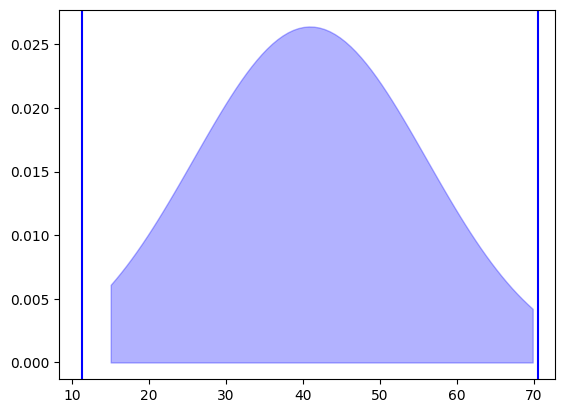

Intervalo de confianza del 95% para la distribución normal ajustada: (11.24252787869517, 70.49115358344582)


In [36]:
intervalo_inferior, intervalo_superior = stats.norm.interval(nivel_confianza, loc=mu, scale=std)

plt.fill_between(x, stats.norm.pdf(x, mu, std), where=(x >= intervalo_inferior) & (x <= intervalo_superior), color='blue', alpha=0.3)
plt.axvline(intervalo_inferior, color='blue', linestyle='-')
plt.axvline(intervalo_superior, color='blue', linestyle='-')

plt.show()

print(f"Intervalo de confianza del 95% para la distribución normal ajustada: ({intervalo_inferior}, {intervalo_superior})")

Este intervalo nos indica que, con un 95% de confianza, la edad de los pacientes con cáncer de tiroides en esta población se encuentra entre aproximadamente 11 y 78 años.